# Общие сведения о данных.

Набор данных (<a href="https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data?datasetId=888463">отсюда</a>) состоит из 14 признаков, которые включают возраст, пол, тип боли в груди, кровяное давление в состоянии покоя, уровень холестерина в сыворотке крови, уровень сахара в крови натощак, результаты электрокардиографии (электрокардиограммы) в состоянии покоя, достигнутую максимальную частоту сердечных сокращений, стенокардию, вызванную физической нагрузкой, депрессию зубца ST, вызванную физической нагрузкой по сравнению с отдыхом, наклон сегмента пиковой нагрузки ST, количество крупных сосудов и талассемия. Эта база данных включает 76 атрибутов, но все опубликованные исследования касаются использования подмножества из 14 из них. База данных Кливленда на сегодняшний день является единственной, используемой исследователями ML.

Описание признаков:
1. `id` (идентификатор).
2. `age` (возраст в годах).
3. `sex` (пол).
4. `dataset` (место сбора данных).
5. `cp` (тип боли в груди):
    - *asymptomatic* (бессимптомный);
    - *non-anginal* (отсутствие стенокардии);
    - *atypical angina* (нетипичная стенокардия);
    - *typical angina* (типичная стенокардия).
6. `trestbps` (кровяное давление в состоянии покоя в мм. рт. ст. при поступлении в больницу).
7. `chol` (уровень сывороточного (общего) холестерина в мг/дл).
8. `fbs` (уровень сахара в крови натощак > 120 мг/дл).
9. `restecg` (результаты электрокардиографии в состоянии покоя):
    - *normal* (в норме);
    - *st-t abnormality* (неспецифические изменения комплекса ST-T);
    - *lv hypertrophy* (гипертрофия левого желудочка).
10. `thalch` (достигнутая максимальная частота сердечных сокращений).
11. `exang` (стенокардия, вызванная физической нагрузкой).
12. `oldpeak` (депрессия ST, вызванная физической нагрузкой по сравнению с отдыхом)
13. `slope` (наклон пикового сегмента ST):
    - *flat* (ровный, плоский);
    - *upsloping* (наклонный);
    - *downsloping* (нисходящий склон).
14. `ca` (количество крупных сосудов, окрашенных при рентгеноскопии).
15. `thal` (талассемия).
16. `num` (целевой признак):
    - *0* (отсутствие СЗ);
    - *1* (1-я стадия СЗ);
    - *2* (2-я стадия СЗ);
    - *3* (3-я стадия СЗ);
    - *4* (4-я стадия СЗ).

Для перевода из мг/дл в ммоль/л нужно значение в мг/дл умножить на 10/386.65354.

# Предварительная обработка данных.

In [1]:
import pandas as pd
import numpy as np
import math

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv', sep=',')

Приведём булевские значению к числовому типу там, где это необходимо, и удалим столбец `id`.

In [3]:
data['fbs'] = data['fbs'].apply(lambda x: 1 if x == True else 0)
data['exang'] = data['exang'].map({True: 1, False: 0})
data.drop(['id'], axis=1, inplace=True)

In [4]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,63,Male,Cleveland,typical angina,145.0,233.0,1,lv hypertrophy,150.0,0.0,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,0,lv hypertrophy,108.0,1.0,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,0,lv hypertrophy,129.0,1.0,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,0,normal,187.0,0.0,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,0,lv hypertrophy,172.0,0.0,1.4,upsloping,0.0,normal,0


In [5]:
data.shape

(920, 15)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    int64  
 1   sex       920 non-null    object 
 2   dataset   920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       920 non-null    int64  
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    float64
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  num       920 non-null    int64  
dtypes: float64(6), int64(3), object(6)
memory usage: 107.9+ KB


Видим, что в наборе данных присутствуют пропуски.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,920.0,53.510870,9.424685,28.0,47.0,54.0,60.0,77.0
trestbps,861.0,132.132404,19.066070,0.0,120.0,130.0,140.0,200.0
chol,890.0,199.130337,110.780810,0.0,175.0,223.0,268.0,603.0
fbs,920.0,0.150000,0.357266,0.0,0.0,0.0,0.0,1.0
thalch,865.0,137.545665,25.926276,60.0,120.0,140.0,157.0,202.0
exang,865.0,0.389595,0.487941,0.0,0.0,0.0,1.0,1.0
oldpeak,858.0,0.878788,1.091226,-2.6,0.0,0.5,1.5,6.2
ca,309.0,0.676375,0.935653,0.0,0.0,0.0,1.0,3.0
num,920.0,0.995652,1.142693,0.0,0.0,1.0,2.0,4.0


Исходя из числовой статистики заметим, что некоторые значения неестественны. Например, `chol` = 0 или 603, `trestbps` = 0.

# Обработка выбросов.

## Признак `chol` (уровень общего холестерина).

Начнём с обработки выбросов для числовых признаков, а именно с признака `chol` (уровень общего холестерина).

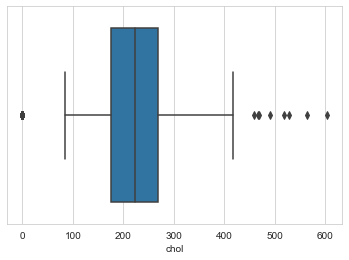

In [8]:
sns.set_style('whitegrid');
sns.boxplot(x='chol', data=data, whis=1.7);

Как видно из графика выше, есть значения, аномально низкие или аномально высокие, что в принципе невозможно. Посмотрим на количество пациентов с такой «проблемой», вычислив межквартильный диапазон (IQR) и отсупив от него на 1.7 влево и вправо соответственно (почему именно на 1.7 можно прочитать <a href="https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097">здесь</a>).

In [9]:
IQR = data['chol'].quantile(.75) - data['chol'].quantile(.25)
data[data['chol'] <= (data['chol'].quantile(.25) - 1.7*IQR)].shape

(172, 15)

In [10]:
data[data['chol'] >= (data['chol'].quantile(.75) + 1.7*IQR)].shape

(8, 15)

Видим, что в общей сложности 180 человек имеют среди описаний признаков выбросы. Посмотрим на количество людей, у которых значение признака `chol` равно 0.

In [11]:
data[data['chol'] == 0].shape

(172, 15)

Как можно видеть, количество пациентов, у которых значение признака является выбросом, и количество пациентов, у которых значение $-$ 0, равны. Кроме того, можно утверждать, что это одни и те же пациенты.

Равенство 0 значений признака `chol` по сути является доказательством того, что эти значения являются *не выбросами*, а *пропусками*.

In [12]:
data.loc[data[data['chol'] == 0].index, ['chol']] = np.nan

Проведём аналогичные рассуждения для людей с аномально высоким уровнем общего холестерина.

In [13]:
data[data['chol'] >= (data['chol'].quantile(.75) + 1.7*IQR)]['num'].value_counts()

1    5
0    3
Name: num, dtype: int64

Так как высокий уровень холестерина является во многом определяющим для развития ССЗ, то, судя по целевому признаку, неправдоподобные значения не являются верными.

Пока что трогать их не будем, но <font color="red">впоследствии они могут существенно повлиять на качество модели</font>.

## Признак `trestbps` (кровяное давление в состоянии покоя при поступлении в больницу).

Обработаем выбросы признака `trestbps` (кровяное давление в состоянии покоя при поступлении в больницу).

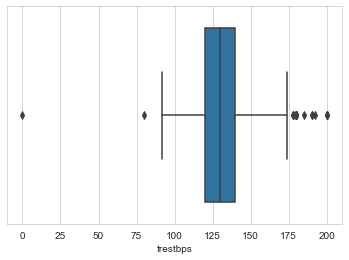

In [14]:
sns.set_style('whitegrid');
sns.boxplot(x='trestbps', data=data, whis=1.7);

Как можно видеть из графика, корректировке подлежит лишь признак `trestbps` пациента, у которого кровяное давление в состоянии покоя при поступлении в больницу почему-то равняется 0, поскольку остальные выбросы имеют место на существование по объективным причинам возможности функционирования человеческого организма.

In [15]:
data[data['trestbps'] == 0]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
753,55,Male,VA Long Beach,non-anginal,0.0,NaN,0,normal,155.0,0.0,1.5,flat,NaN,NaN,3


Однако, аналогично вышеприведенным рассуждениям, это значение является, скорее, *пропуском*, а *не выбросом*.

In [16]:
data.loc[data[data['trestbps'] == 0].index, ['trestbps']] = np.nan

После того, как были обработаны выбросы, переходим к заполнению пропусков.

# Обработка пропусков в количественных данных.

In [17]:
data.describe(include='object').T

,count,unique,top,freq
sex,920,2,Male,726
dataset,920,4,Cleveland,304
cp,920,4,asymptomatic,496
restecg,918,3,normal,551
slope,611,3,flat,345
thal,434,3,normal,196


Посмотрим, сколько значений отсутсвует в каждом столбце признака.

In [18]:
data.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps     60
chol        202
fbs           0
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

## Стандартизация данных.

Для улучшения качества модели, стандартизируем данные.

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
number_columns = ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak', 'ca']

In [21]:
scaler = StandardScaler()
  
data[number_columns] = scaler.fit_transform(data[number_columns])

In [22]:
data.head()

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1.007386,Male,Cleveland,typical angina,0.686299,-0.236515,2.380476,lv hypertrophy,0.480653,-0.798910,1.303159,downsloping,-0.724064,fixed defect,0
1,1.432034,Male,Cleveland,asymptomatic,1.495998,0.669681,-0.420084,lv hypertrophy,-1.140262,1.251705,0.569611,flat,2.487454,normal,2
2,1.432034,Male,Cleveland,asymptomatic,-0.663200,-0.304907,-0.420084,lv hypertrophy,-0.329805,1.251705,1.578239,flat,1.416948,reversable defect,1
3,-1.752828,Male,Cleveland,non-anginal,-0.123401,0.054152,-0.420084,normal,1.908602,-0.798910,2.403480,downsloping,-0.724064,normal,0
4,-1.328180,Female,Cleveland,atypical angina,-0.123401,-0.732357,-0.420084,lv hypertrophy,1.329704,-0.798910,0.477918,upsloping,-0.724064,normal,0


In [23]:
data.corr()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,ca,num
age,1.000000,0.253042,0.083326,0.219915,-0.365778,0.201626,0.258243,0.370416,0.339596
trestbps,0.253042,1.000000,0.088763,0.161847,-0.102427,0.150223,0.171562,0.093705,0.141189
chol,0.083326,0.088763,1.000000,0.049268,-0.047186,0.085755,0.046960,0.127798,0.067315
fbs,0.219915,0.161847,0.049268,1.000000,-0.032594,0.030620,0.054841,0.141167,0.129539
thalch,-0.365778,-0.102427,-0.047186,-0.032594,1.000000,-0.356439,-0.151174,-0.264094,-0.366265
exang,0.201626,0.150223,0.085755,0.030620,-0.356439,1.000000,0.392492,0.127385,0.388408
oldpeak,0.258243,0.171562,0.046960,0.054841,-0.151174,0.392492,1.000000,0.281817,0.443084
ca,0.370416,0.093705,0.127798,0.141167,-0.264094,0.127385,0.281817,1.000000,0.516216
num,0.339596,0.141189,0.067315,0.129539,-0.366265,0.388408,0.443084,0.516216,1.000000


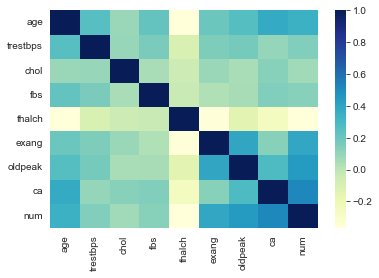

In [24]:
sns.heatmap(data.corr(), cmap = 'YlGnBu', linecolor='green');

## Признак `trestbps` (кровяное давление в состоянии покоя при поступлении в больницу).

Начнём с признака `trestbps` (кровяное давление в состоянии покоя при поступлении в больницу). Видим, что этот признак сильнее всего коррелирует с признаками `age` и `fbs`, что вполне может соответствовать действительности.

Выполним группировку пациентов по вышеназванным признакам.

In [25]:
data.groupby(['age', 'fbs'])['trestbps'].median()

age        fbs      
-2.708286  -0.420084   -0.123401
-2.602124  -0.420084   -0.123401
-2.495962  -0.420084    2.035798
-2.389800  -0.420084   -1.203000
-2.283638  -0.420084   -1.203000
                          ...   
 2.175168   2.380476    0.686299
 2.281330  -0.420084    0.200479
            2.380476    1.765898
 2.387492  -0.420084   -0.555240
 2.493654  -0.420084   -0.420290
Name: trestbps, Length: 82, dtype: float64

In [26]:
data['trestbps'] = data.groupby(['age', 'fbs'])['trestbps'].apply(lambda x: x.fillna(x.median()))

Убедимся, что в столбце `trestbps` отсутствуют пропуски.

In [27]:
data['trestbps'].isna().sum()

0

Посмотрим на распределение.

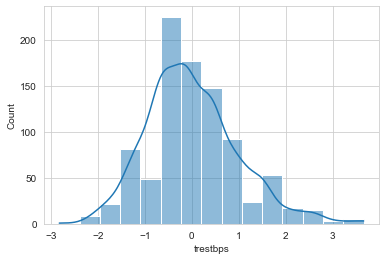

In [28]:
sns.histplot(data=data, x='trestbps', bins=15, kde = True);

Распределение значений кровяного давления в состоянии покоя при поступлении в больницу близко к нормальному.

## Признак `thalch`.

Проведём аналогичную операцию со всеми количественными признаками, где есть пропуски, группируя их в зависимости от наибольшей корреляции. Чтобы не строить каждый раз матрицу корреляций, будем обновлять матрицу и тепловую карту, которые были созданы ранее.

Признак `thalch` сильнее всего обратно коррелируют с признаками `age` и `trestbps`, поэтому будем использовать их.

In [29]:
data.groupby(['age', 'trestbps'])['thalch'].median()

age        trestbps 
-2.708286  -0.123401    1.831416
-2.602124  -0.663200    0.866585
           -0.123401    2.487500
            0.416399    1.252517
-2.495962   2.035798    1.252517
                          ...   
 2.281330   2.035798   -1.140262
 2.387492  -1.526880   -0.677144
            0.416399   -0.831517
 2.493654  -0.447280   -1.063076
           -0.393300    0.943772
Name: thalch, Length: 501, dtype: float64

In [30]:
data['thalch'] = data.groupby(['age', 'trestbps'])['thalch'].apply(lambda x: x.fillna(x.median()))

Убедимся, что в столбце `thalch` отсутствуют пропуски.

In [31]:
data['thalch'].isna().sum()

17

Вместо того, чтобы заполнять пропущенные значения средним, есть смысл удалить эти записи из выборки.

In [32]:
data = data.drop(data[data['thalch'].isna()].index, axis=0)

Посмотрим на распределение.

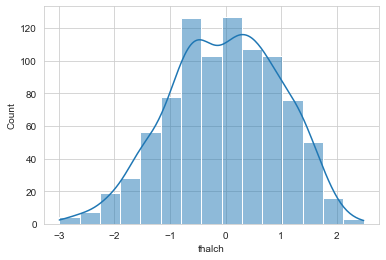

In [33]:
sns.histplot(data=data, x='thalch', bins=15, kde = True);

Распределение значений достигнутой максимальной частоты сердечных сокращений нормально.

## Признак `oldpeak`.

Заполним пропуски в значениях признака `oldpeak`, также опираясь на признаки `age` и `trestbps`.

In [34]:
data.groupby(['age', 'trestbps'])['oldpeak'].median()

age        trestbps 
-2.708286  -0.123401   -0.805791
-2.602124  -0.663200   -0.805791
           -0.123401   -0.805791
            0.416399   -0.805791
-2.495962   2.035798   -0.805791
                          ...   
 2.281330   2.035798   -0.805791
 2.387492  -1.526880    2.403480
            0.416399    0.202837
 2.493654  -0.447280    1.028078
           -0.393300   -0.805791
Name: oldpeak, Length: 490, dtype: float64

In [35]:
data['oldpeak'] = data.groupby(['age', 'trestbps'])['oldpeak'].apply(lambda x: x.fillna(x.median()))

Убедимся, что в столбце `oldpeak` отсутствуют пропуски.

In [36]:
data['oldpeak'].isna().sum()

5

Вместо того, чтобы заполнять пропущенные значения средним, есть смысл удалить часть записей из выборки.

In [37]:
data[data['oldpeak'].isna()]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
606,-1.646666,Male,Switzerland,asymptomatic,0.956198,NaN,-0.420084,normal,-0.677144,1.251705,NaN,NaN,NaN,normal,1
636,-0.160397,Male,Switzerland,asymptomatic,-2.012699,NaN,-0.420084,normal,-2.143686,1.251705,NaN,NaN,NaN,NaN,2
705,1.219710,Male,Switzerland,asymptomatic,0.686299,NaN,-0.420084,st-t abnormality,-2.722584,-0.798910,NaN,NaN,NaN,fixed defect,3
817,0.901224,Male,VA Long Beach,typical angina,-1.095040,0.190936,-0.420084,st-t abnormality,0.480653,1.251705,NaN,NaN,NaN,NaN,1
858,-0.054235,Male,VA Long Beach,non-anginal,1.226098,-1.228200,2.380476,st-t abnormality,0.866585,-0.798910,NaN,NaN,NaN,fixed defect,0


Видим, что можно без зазрения совести удалить первые 3 строки.

In [38]:
data = data.drop(data[data['oldpeak'].isna()].iloc[:3,:].index, axis=0)

In [39]:
data['oldpeak'].isna().sum()

2

В оставшихся 2-х строках установим среднее значение.

In [40]:
data[data['oldpeak'].isna()]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
817,0.901224,Male,VA Long Beach,typical angina,-1.095040,0.190936,-0.420084,st-t abnormality,0.480653,1.251705,NaN,NaN,NaN,NaN,1
858,-0.054235,Male,VA Long Beach,non-anginal,1.226098,-1.228200,2.380476,st-t abnormality,0.866585,-0.798910,NaN,NaN,NaN,fixed defect,0


Вообще, можно будет как-то отдельно обработать эти 2 строки, но пока что удалим их.

In [41]:
data = data.drop(data[data['oldpeak'].isna()].index, axis=0)

Посмотрим на распределение.

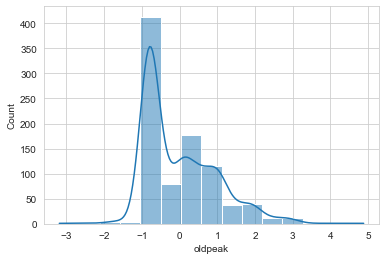

In [42]:
sns.histplot(data=data, x='oldpeak', bins=15, kde = True);

Распределение значений депрессии ST, вызванной физической нагрузкой по сравнению с отдыхом немного скошено влево.

## Признак `exang`.

Для заполнения пропусков в признаке `exang` воспользуемся группировкой данных по признакам `age` и `oldpeak`.

In [43]:
data.groupby(['age', 'oldpeak'])['exang'].median()

age        oldpeak  
-2.708286  -0.805791   -0.798910
-2.602124  -0.805791   -0.798910
-2.495962  -0.805791   -0.798910
-2.389800  -0.805791   -0.798910
            0.569611    1.251705
                          ...   
 2.281330   1.945013    1.251705
 2.387492   0.202837   -0.798910
            2.403480   -0.798910
 2.493654  -0.805791    1.251705
            1.028078    1.251705
Name: exang, Length: 382, dtype: float64

In [44]:
data['exang'] = data.groupby(['age', 'oldpeak'])['exang'].apply(lambda x: x.fillna(x.median()))

Убедимся, что в столбце `exang` отсутствуют пропуски.

In [45]:
data['exang'].isna().sum()

9

In [46]:
data[data['exang'].isna()]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
809,0.158089,Male,VA Long Beach,non-anginal,-0.663200,-0.031338,2.380476,st-t abnormality,-0.271915,NaN,-0.668251,NaN,NaN,NaN,1
831,0.795061,Male,VA Long Beach,atypical angina,-0.123401,0.618386,-0.420084,normal,-0.773627,NaN,-0.347324,NaN,NaN,NaN,0
832,-0.478883,Male,VA Long Beach,non-anginal,-0.123401,-1.792435,-0.420084,normal,0.635026,NaN,-0.530711,NaN,NaN,NaN,3
834,-0.372721,Male,VA Long Beach,asymptomatic,0.416399,-0.492985,-0.420084,normal,0.094721,NaN,-0.530711,NaN,NaN,NaN,1
861,0.264251,Male,VA Long Beach,non-anginal,-0.123401,-0.663965,2.380476,st-t abnormality,-0.638551,NaN,-0.530711,NaN,NaN,NaN,4
867,0.158089,Male,VA Long Beach,asymptomatic,-0.663200,-0.732357,2.380476,st-t abnormality,-0.271915,NaN,-0.668251,NaN,NaN,NaN,1
869,0.795061,Male,VA Long Beach,asymptomatic,-0.123401,0.772269,-0.420084,st-t abnormality,-0.773627,NaN,-0.347324,NaN,NaN,NaN,3
879,0.264251,Male,VA Long Beach,asymptomatic,-0.123401,0.601288,2.380476,normal,-0.638551,NaN,-0.530711,NaN,NaN,NaN,1
905,0.795061,Male,VA Long Beach,non-anginal,-0.123401,0.635484,-0.420084,normal,-0.773627,NaN,-0.347324,NaN,NaN,NaN,1


Вместо того, чтобы заполнять пропущенные значения средним, есть смысл удалить эти записи из выборки.

In [47]:
data = data.drop(data[data['exang'].isna()].index, axis=0)

Посмотрим на распределение.

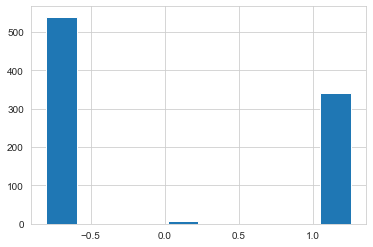

In [48]:
data['exang'].hist();

Заметим, что в выборке присутствуют значения равные 0.22639741, что невозможно, поскольку признак бинарный. Отредактируем эти значения.

In [49]:
data['exang'].unique()

array([-0.79891024,  1.25170507,  0.22639741])

In [50]:
data[(data['exang'] > 0) & (data['exang'] < 1)]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
393,-0.585045,Female,Hungary,atypical angina,-0.447280,1.045837,-0.420084,st-t abnormality,1.271814,0.226397,1.028078,upsloping,NaN,NaN,0
714,1.644358,Male,Switzerland,asymptomatic,0.416399,NaN,-0.420084,st-t abnormality,0.210500,0.226397,1.028078,NaN,NaN,reversable defect,3
778,0.901224,Male,VA Long Beach,atypical angina,-0.123401,NaN,-0.420084,normal,-0.677144,0.226397,0.844691,NaN,NaN,NaN,0
844,0.901224,Male,VA Long Beach,non-anginal,-0.123401,-0.732357,-0.420084,st-t abnormality,-0.677144,0.226397,0.844691,NaN,NaN,NaN,1
856,1.856682,Male,VA Long Beach,non-anginal,-0.123401,-0.441691,-0.420084,normal,-0.870110,0.226397,-0.805791,NaN,NaN,NaN,3
887,1.644358,Male,VA Long Beach,non-anginal,0.416399,0.413210,-0.420084,lv hypertrophy,0.210500,0.226397,1.028078,NaN,NaN,NaN,0
916,0.901224,Male,VA Long Beach,typical angina,-0.123401,-1.843729,-0.420084,st-t abnormality,-0.677144,0.226397,0.844691,NaN,NaN,NaN,0


Проведём редактирование вручную.

In [51]:
data.loc[[393, 778, 887, 916], 'exang'] = -0.798910
data.loc[[714, 856, 844], 'exang'] = 1.251705

Повторно посмотрим на гистограмму распределения.

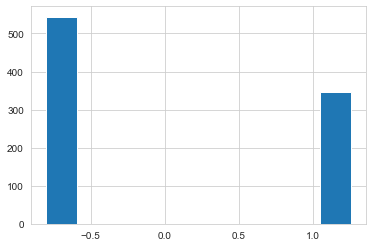

In [52]:
data['exang'].hist();

Бинарные значения стенокардии, вызванной физической нагрузкой, вполне похожи на реально собранные данные.

## Признак `chol`.

Заполним пропуски в стобце `chol`, используя столбцы `trestbps` и `exang`.

In [53]:
data.groupby(['trestbps', 'exang'])['chol'].median()

trestbps   exang    
-2.822398   1.251705         NaN
-2.174639   1.251705   -2.219886
-2.066679  -0.798910   -0.817848
            1.251705   -0.339103
-2.012699  -0.798910         NaN
                          ...   
 3.115397  -0.798910   -0.099731
            1.251705    0.686779
 3.223357  -0.798910    0.618386
 3.655196  -0.798910         NaN
            1.251705   -0.065534
Name: chol, Length: 106, dtype: float64

In [54]:
data['chol'] = data.groupby(['trestbps', 'exang'])['chol'].apply(lambda x: x.fillna(x.median()))

Оценим количество пропущенных значений в столбце `chol`.

In [55]:
data['chol'].isna().sum()

24

Обработаем пропуски.

In [56]:
data['chol'] = data.groupby(['age', 'exang'])['chol'].apply(lambda x: x.fillna(x.median()))

In [57]:
data = data.drop(data[data['chol'].isna()].index, axis=0)

Посмотрим на распределение.

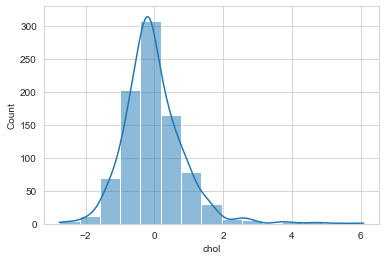

In [58]:
sns.histplot(data=data, x='chol', bins=15, kde = True);

Распределение значений признака уровень сывороточного холестерина немного скошено влево.

## Признак `ca`.

Признак `ca` сильнее всего коррелирует с признаками `age` и `oldpeak`, поэтому для заполнения пропусков воспользуемся ими.

In [59]:
data.groupby(['age', 'oldpeak'])['ca'].median()

age        oldpeak  
-2.708286  -0.805791         NaN
-2.602124  -0.805791   -0.724064
-2.495962  -0.805791         NaN
-2.389800  -0.805791         NaN
            0.569611         NaN
                          ...   
 2.281330   1.945013         NaN
 2.387492   0.202837   -0.724064
            2.403480         NaN
 2.493654  -0.805791    2.487454
            1.028078         NaN
Name: ca, Length: 377, dtype: float64

In [60]:
data['ca'] = data.groupby(['age', 'oldpeak'])['ca'].apply(lambda x: x.fillna(x.median()))

Найдём количество пропусков в столбце `ca`.

In [61]:
data['ca'].isna().sum()

262

In [62]:
data['ca'].isna().sum() / data.shape[0]

0.29504504504504503

Видим, что после заполнения пропусков в данных осталось примерно 30 % отсутствующих значений. Есть смысл удалить этот столбец, несмотря на то, что признак хорошо кореллирует с целевым.

In [63]:
data.drop(['ca'], axis=1, inplace=True)

Обработали возможное количество пропусков в количественных данных, посмотрим на общую статистику пропущенных значений.

In [64]:
data.isnull().sum()

age           0
sex           0
dataset       0
cp            0
trestbps      0
chol          0
fbs           0
restecg       2
thalch        0
exang         0
oldpeak       0
slope       277
thal        458
num           0
dtype: int64

# Обработка пропусков в категориальных признаках.

Видно, что ещё есть необходимость заполнения пропусков в признаках `restecg` (обработаем вручную), `slope` и `thal`, последние два из которых удалим.

In [65]:
data.drop(['slope', 'thal'], axis=1, inplace=True)

In [66]:
data[data['restecg'].isna()]

,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
571,0.158089,Male,Hungary,typical angina,0.416399,0.823563,-0.420084,NaN,-0.059652,-0.79891,-0.805791,1
598,-2.071314,Male,Switzerland,asymptomatic,-0.933100,0.310622,-0.420084,NaN,0.635026,-0.79891,-0.622404,1


In [67]:
data[(data['sex'] == 'Male') & (data['fbs'] < 0) & (data['exang'] < 0)]['restecg'].value_counts()

normal              221
lv hypertrophy       65
st-t abnormality     43
Name: restecg, dtype: int64

Заполним 2 пропуска наиболее встречающимся значением normal.

In [68]:
data.loc[[571, 598], 'restecg'] = 'normal'

Посмотрим на распределение значений признака результаты электрокардиографии в состоянии покоя.

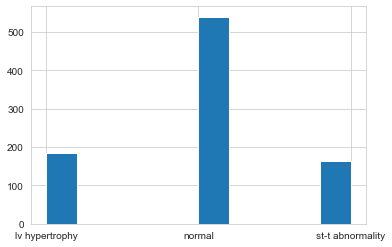

In [69]:
data['restecg'].hist();

Распределение является вполне ожидаемым и соответствует нормальным представлениям об этом признаке.

Проверим отсутствие пропусков в данных.

In [70]:
data.isnull().sum()

age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

# Обучение моделей дерева и случайного леса без использования категориальных признаков.

Для начала попробуем обучить модель, не используя категориальные признаки.

## Дерево.

Построим первую модель: дерево принятия решений.

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split 
# функции для кросс-валидации и разделения на обучающую и тестовую выборки

Разобьём выборку на 2 подмножества: обучающее и тестовое.

In [72]:
data.columns[[0, 4, 5, 6, 8, 9, 10]]

Index(['age', 'trestbps', 'chol', 'fbs', 'thalch', 'exang', 'oldpeak'], dtype='object')

In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    data[data.columns[[0, 4, 5, 6, 8, 9, 10]]], data['num'], test_size=.3, random_state=0)

Создадим экземпляр класса *tree*.

In [74]:
first_tree = DecisionTreeClassifier(random_state=0)

Кросс-валидация — это методика обучения и оценки модели, которая разбивает данные на несколько секций и обучает несколько алгоритмов на этих секциях. Этот метод повышает надежность модели, удерживая данные вне процесса обучения. Кроме повышения производительности на многих неучитываемых наблюдениях, в средах с ограниченными данными он может быть эффективным инструментом для обучения моделей с меньшим набором данных.

In [75]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.42349677419354836

In [76]:
from sklearn.model_selection import GridSearchCV

tree_params = {"max_depth": np.arange(1, 11), "max_features": [0.5, 0.7, 1]}
tree_grid = GridSearchCV(first_tree, tree_params, cv=5, n_jobs=-1)

In [77]:
%%time
tree_grid.fit(X_train, y_train);

Wall time: 2.73 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [78]:
tree_grid.best_score_, tree_grid.best_params_

(0.5684129032258065, {'max_depth': 3, 'max_features': 0.7})

Построим конечную модель дерева.

In [79]:
first_tree_test = DecisionTreeClassifier(max_depth=tree_grid.best_params_['max_depth'],
                                   max_features=tree_grid.best_params_['max_features'], random_state=0)

In [80]:
first_tree_test.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=0.7, random_state=0)

Проверим построенную модель на тестовой выборке:

In [81]:
first_tree_test_predict = first_tree_test.predict(X_test)

Исследуем долю верных ответов:

In [82]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, first_tree_test_predict)

0.5393258426966292

## Лес.

Построим вторую модель: случайный лес.

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

first_rfc = RandomForestClassifier(random_state=0)

In [84]:
np.mean(cross_val_score(first_rfc, X_train, y_train, cv=5))

0.5571870967741936

In [85]:
first_rfc.fit(X_train, y_train);

In [86]:
first_random_forest_predict = first_rfc.predict(X_test);

In [87]:
accuracy_score(y_test, first_random_forest_predict)

0.5168539325842697

# Дело в целевом признаке? Приведение его к бинарному формату и обучение модели.

<font color="red">А что, если дело в целевом признаке?</font> Возможно, есть смысл сделать его бинарным?

In [88]:
data.loc[data[data['num'] > 1].index, 'num'] = 1

Попробуем обучать модели после такого преобразования.

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    data[data.columns[[0, 4, 5, 6, 8, 9, 10]]], data['num'], test_size=.3, random_state=0)

## Дерево.

Создадим экземпляр класса *tree*.

In [90]:
two_tree = DecisionTreeClassifier(random_state=0)

In [91]:
np.mean(cross_val_score(two_tree, X_train, y_train, cv=5))

0.666683870967742

In [92]:
tree_params = {"max_depth": np.arange(1, 11), "max_features": [0.5, 0.7, 1]}
tree_grid = GridSearchCV(two_tree, tree_params, cv=5, n_jobs=-1)

In [93]:
%%time
tree_grid.fit(X_train, y_train);

Wall time: 178 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [94]:
tree_grid.best_score_, tree_grid.best_params_

(0.7342838709677418, {'max_depth': 3, 'max_features': 0.5})

Построим конечную модель дерева.

In [95]:
two_tree_test = DecisionTreeClassifier(max_depth=tree_grid.best_params_['max_depth'],
                                   max_features=tree_grid.best_params_['max_features'], random_state=0)

In [96]:
two_tree_test.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=0.5, random_state=0)

Проверим построенную модель на тестовой выборке:

In [97]:
two_tree_test_predict = two_tree_test.predict(X_test)

Исследуем долю верных ответов:

In [98]:
accuracy_score(y_test, two_tree_test_predict)

0.7153558052434457

## Лес.

Построим вторую после приведения целевого признака к банарному формату модель: случайный лес.

Опишем гиперпараметры случайного леса (подробнее <a href="https://translated.turbopages.org/proxy_u/en-ru.ru.e02f6950-64170992-ae5d6326-74722d776562/https/www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/">здесь</a>):
- n_estimator - это гиперпараметр, который определяет количество деревьев, которые будут использоваться в модели. Дерево также можно понимать как подразделы (по умолчанию 100);
- для обучения модели машинного обучения данный набор данных должен содержать несколько функций / переменных для прогнозирования метки / цели. Max_features ограничивает количество, чтобы выбрать максимальное количество объектов в каждом дереве (по умолчанию "sqrt")
- дерево является неполным без разделения или дочернего узла. max_depth определяет максимальное количество разделений, которые может выполнить каждое дерево. Если значение max_depth слишком низкое, модель будет обучаться меньше и будет иметь высокий уклон, что приведет к недостаточной подгонке модели. Точно так же, если значение max_depth велико, модель узнает слишком много и приводит к высокой дисперсии, что приводит к переобучению модели (None);
- max_leaf_nodes ограничивает рост каждого дерева;
- max_sample определяет, какая часть набора данных предоставляется каждому отдельному дереву;
- min_sample_split определяет минимальное количество наблюдений дерева решений в любом заданном узле для разделения.

In [99]:
two_rfc = RandomForestClassifier(random_state=0)

In [100]:
np.mean(cross_val_score(two_rfc, X_train, y_train, cv=5))

0.7633032258064516

In [101]:
two_rfc.fit(X_train, y_train);

In [102]:
two_random_forest_predict = two_rfc.predict(X_test);

In [103]:
accuracy_score(y_test, two_random_forest_predict)

0.7378277153558053

In [104]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

Во-первых, давайте используем GridSearchCV для получения наилучших параметров для модели. Для этого мы передадим экземпляр RandomFoestClassifier() в модель, а затем подгоним GridSearchCV, используя обучающие данные, чтобы найти наилучшие параметры.

In [105]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)

In [106]:
%%time
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)
Wall time: 40.7 s


Обучим модель с подобранными параметрами.

In [107]:
from sklearn.metrics import classification_report

In [108]:
two_rfc_test = RandomForestClassifier(max_depth=3,
                                      max_features='log2',
                                      max_leaf_nodes=6,
                                      n_estimators=100)
two_rfc_test.fit(X_train, y_train)
two_rfc_test_predict = two_rfc_test.predict(X_test)
print(classification_report(two_rfc_test_predict, y_test))

              precision    recall  f1-score   support

           0       0.73      0.68      0.70       126
           1       0.73      0.77      0.75       141

    accuracy                           0.73       267
   macro avg       0.73      0.73      0.73       267
weighted avg       0.73      0.73      0.73       267



## Логистическая регрессия.

In [109]:
from sklearn.linear_model import LogisticRegression

one_logreg = LogisticRegression(random_state=0)
np.mean(cross_val_score(one_logreg, X_train, y_train, cv=5))

0.7696645161290323

In [110]:
one_logreg.fit(X_train, y_train)
y_pred = one_logreg.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.76      0.69      0.72       131
           1       0.72      0.79      0.76       136

    accuracy                           0.74       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.74      0.74      0.74       267



# Добавление категориальных признаков.

Попробуем добавить категориальные признаки и обучить модель с ними.

Настройки решателя.

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 919
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       888 non-null    float64
 1   sex       888 non-null    object 
 2   dataset   888 non-null    object 
 3   cp        888 non-null    object 
 4   trestbps  888 non-null    float64
 5   chol      888 non-null    float64
 6   fbs       888 non-null    float64
 7   restecg   888 non-null    object 
 8   thalch    888 non-null    float64
 9   exang     888 non-null    float64
 10  oldpeak   888 non-null    float64
 11  num       888 non-null    int64  
dtypes: float64(7), int64(1), object(4)
memory usage: 122.5+ KB


## Обработка с помощью `One-Hot Encoder`.

Начнём с применения One-Hot Encoder'а.

In [112]:
data_one_hot = data.copy()

In [113]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()

Обработаем признак `sex`.

In [114]:
sex_values = [[elem] for elem in data['sex'].values]
data_sex = onehotencoder.fit_transform(sex_values)

data_sex.toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [115]:
df_sex = pd.DataFrame(data_sex.toarray(), columns=
                             [str(name) for name in onehotencoder.categories_[0]])
data_one_hot.drop(['sex'], axis=1, inplace=True)

In [116]:
data_one_hot.insert(1, df_sex.columns[0].lower(), df_sex.values[:, 0])
data_one_hot.insert(1, df_sex.columns[1].lower(), df_sex.values[:, 1])

Аналогичным образом обработаем ещё 3 категориальных признака.

In [117]:
data['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [118]:
dataset_values = [[elem] for elem in data['dataset'].values]
data_dataset = onehotencoder.fit_transform(dataset_values)

data_dataset.toarray()

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [119]:
df_dataset = pd.DataFrame(data_dataset.toarray(), columns=
                             [str(name) for name in onehotencoder.categories_[0]])
data_one_hot.drop(['dataset'], axis=1, inplace=True)

In [120]:
for i in range(4):
    data_one_hot.insert(3 + i, df_dataset.columns[i].lower(), df_dataset.values[:, i])

In [121]:
data['cp'].unique()

array(['typical angina', 'asymptomatic', 'non-anginal', 'atypical angina'],
      dtype=object)

In [122]:
cp_values = [[elem] for elem in data['cp'].values]
data_cp = onehotencoder.fit_transform(cp_values)

data_cp.toarray()

array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [123]:
df_cp = pd.DataFrame(data_cp.toarray(), columns=
                             [str(name) for name in onehotencoder.categories_[0]])
data_one_hot.drop(['cp'], axis=1, inplace=True)

In [124]:
for i in range(4):
    data_one_hot.insert(7 + i, df_cp.columns[i].lower(), df_cp.values[:, i])

In [125]:
data['restecg'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality'], dtype=object)

In [126]:
restecg_values = [[elem] for elem in data['restecg'].values]
data_restecg = onehotencoder.fit_transform(restecg_values)

data_restecg.toarray()

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [127]:
df_restecg = pd.DataFrame(data_restecg.toarray(), columns=
                             [str(name) for name in onehotencoder.categories_[0]])
data_one_hot.drop(['restecg'], axis=1, inplace=True)

In [128]:
for i in range(3):
    data_one_hot.insert(14 + i, df_restecg.columns[i].lower(), df_restecg.values[:, i])

# Обучение моделей с использованием всех признаков.

После того, как были обработаны все категориальные признаки, приступим к обучению.

In [129]:
X_train, X_test, y_train, y_test = train_test_split(
    data_one_hot[data_one_hot.columns[:-1]], data_one_hot['num'], test_size=.3, random_state=0)

## Дерево.

Создадим экземпляр класса *tree*.

In [130]:
three_tree = DecisionTreeClassifier(random_state=0)

In [131]:
np.mean(cross_val_score(three_tree, X_train, y_train, cv=5))

0.7149032258064516

In [132]:
from sklearn.model_selection import GridSearchCV

tree_params = {"max_depth": np.arange(1, 11), "max_features": [0.5, 0.7, 1]}
tree_grid = GridSearchCV(three_tree, tree_params, cv=5, n_jobs=-1)

In [133]:
%%time
tree_grid.fit(X_train, y_train);

Wall time: 191 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [134]:
tree_grid.best_score_, tree_grid.best_params_

(0.7632129032258066, {'max_depth': 5, 'max_features': 0.5})

Проверим гиперпараметр `max_features`.

In [135]:
max_features = {'max_features': [0.4, 0.45, 0.55, 0.6]}

tree_grid_features = GridSearchCV(three_tree, max_features, cv=5, n_jobs=-1)

In [136]:
%%time
tree_grid_features.fit(X_train,y_train);

Wall time: 39.7 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_features': [0.4, 0.45, 0.55, 0.6]})

In [137]:
tree_grid_features.best_score_, tree_grid_features.best_params_

(0.734283870967742, {'max_features': 0.55})

Построим конечную модель дерева.

In [138]:
three_tree_test = DecisionTreeClassifier(max_depth=tree_grid.best_params_['max_depth'],
                                   max_features=tree_grid_features.best_params_['max_features'], random_state=0)

In [139]:
three_tree_test.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features=0.55, random_state=0)

Проверим построенную модель на тестовой выборке:

In [140]:
three_tree_test_predict = three_tree_test.predict(X_test)

Исследуем долю верных ответов:

In [141]:
accuracy_score(y_test, three_tree_test_predict)

0.7453183520599251

In [142]:
from sklearn.metrics import precision_recall_curve, classification_report, roc_curve

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Ошибки классификации бывают двух видов: False Positive и False Negative. В статистике первый вид ошибок называют ошибкой I-го рода, а второй — ошибкой II-го рода. В нашей задаче ошибкой первого рода будет принятие здорового человека за больного, соответственно, ошибкой второго рода будет являться "пропуск" больного человека и ошибочное принятие его за здорового.

In [143]:
report = classification_report(y_test, three_tree_test.predict(X_test), target_names=['Здоровый', 'Больной'])
print(report)

              precision    recall  f1-score   support

    Здоровый       0.69      0.78      0.73       118
     Больной       0.80      0.72      0.76       149

    accuracy                           0.75       267
   macro avg       0.75      0.75      0.74       267
weighted avg       0.75      0.75      0.75       267



Нарисуем ROC-кривую.

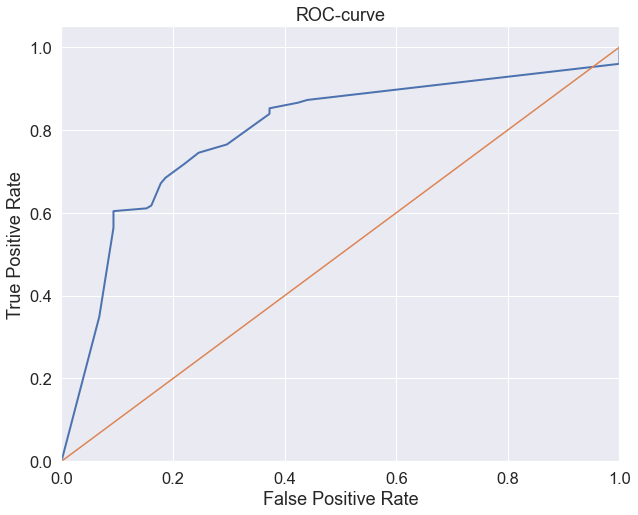

In [144]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, three_tree_test.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

## Лес.

Построим вторую модель: случайный лес.

In [145]:
three_rfc = RandomForestClassifier(random_state=0)

In [146]:
np.mean(cross_val_score(three_rfc, X_train, y_train, cv=5))

0.7954967741935484

In [147]:
three_rfc.fit(X_train, y_train);

In [148]:
three_random_forest_predict = three_rfc.predict(X_test);

In [149]:
accuracy_score(y_test, three_random_forest_predict)

0.7940074906367042

In [150]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

Во-первых, давайте используем GridSearchCV для получения наилучших параметров для модели. Для этого мы передадим экземпляр RandomFoestClassifier() в модель, а затем подгоним GridSearchCV, используя обучающие данные, чтобы найти наилучшие параметры.

In [151]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)

In [152]:
%%time
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)
Wall time: 41.3 s


Обучим модель с подобранными параметрами.

In [153]:
three_rfc_test = RandomForestClassifier(max_depth=3,
                                      max_features='log2',
                                      max_leaf_nodes=6,
                                      n_estimators=25)
three_rfc_test.fit(X_train, y_train)
three_rfc_test_predict = three_rfc_test.predict(X_test)
print(classification_report(three_rfc_test_predict, y_test))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78       120
           1       0.82      0.83      0.82       147

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



Нарисуем ROC-кривую.

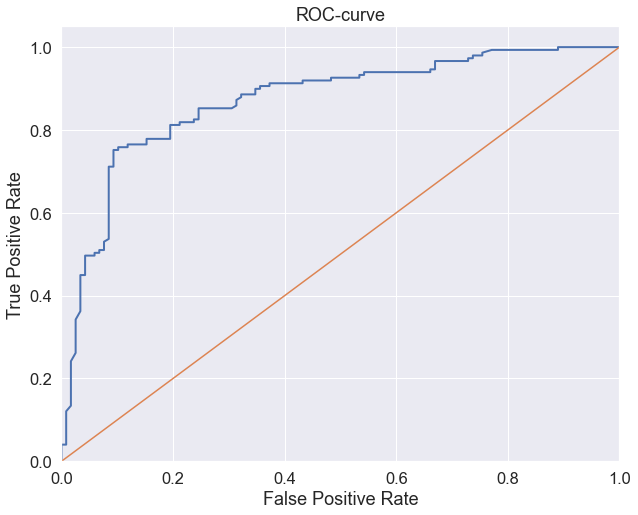

In [154]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, three_rfc_test.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

## Логистическая регрессия.

In [155]:
two_logreg = LogisticRegression(random_state=0)
np.mean(cross_val_score(two_logreg, X_train, y_train, cv=5))

0.8228774193548387

In [156]:
two_logreg.fit(X_train, y_train)
y_pred = two_logreg.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       127
           1       0.81      0.86      0.83       140

    accuracy                           0.82       267
   macro avg       0.82      0.81      0.82       267
weighted avg       0.82      0.82      0.82       267



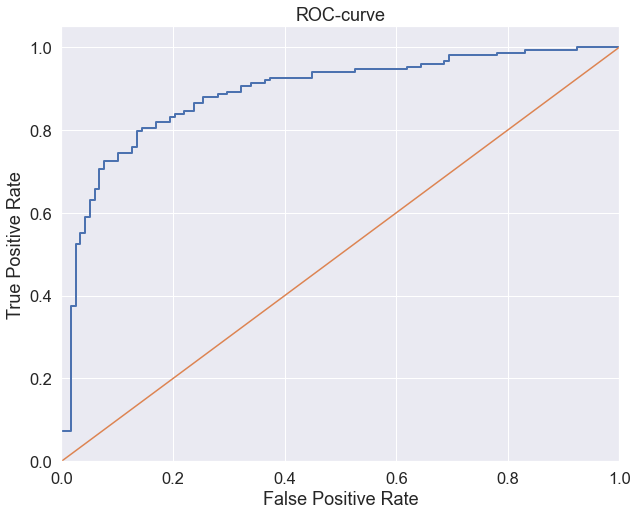

In [157]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, two_logreg.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

# Применение метода главных компонент.

Попробуем применить метод главных компонент.

In [158]:
from sklearn.decomposition import PCA

## 3 главные компоненты.

Возьмём количество главных компонент равное 3 и попробуем обучаться на полученных данных.

In [159]:
X_train, X_test, y_train, y_test = train_test_split(
    data_one_hot[data_one_hot.columns[:-1]], data_one_hot['num'], test_size=.3, random_state=0)

In [160]:
principal = PCA(n_components=3) 
X_train = principal.fit_transform(X_train) 
X_test = principal.transform(X_test) 

## Дерево.

Создадим экземпляр класса *tree*.

In [161]:
four_tree = DecisionTreeClassifier(random_state=0)

In [162]:
np.mean(cross_val_score(four_tree, X_train, y_train, cv=5))

0.6843999999999999

In [163]:
tree_params = {"max_depth": np.arange(1, 11), "max_features": [0.5, 0.7, 1]}
tree_grid = GridSearchCV(four_tree, tree_params, cv=5, n_jobs=-1)

In [164]:
%%time
tree_grid.fit(X_train, y_train);

Wall time: 125 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [165]:
tree_grid.best_score_, tree_grid.best_params_

(0.7776903225806452, {'max_depth': 2, 'max_features': 0.5})

Проверим гиперпараметр `max_features`.

In [166]:
max_features = {'max_features': [0.4, 0.45, 0.55, 0.6]}

tree_grid_features = GridSearchCV(four_tree, max_features, cv=5, n_jobs=-1)

In [167]:
%%time
tree_grid_features.fit(X_train,y_train);

Wall time: 29.5 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_features': [0.4, 0.45, 0.55, 0.6]})

In [168]:
tree_grid_features.best_score_, tree_grid_features.best_params_

(0.6810709677419354, {'max_features': 0.4})

Построим конечную модель дерева.

In [169]:
four_tree_test = DecisionTreeClassifier(max_depth=tree_grid.best_params_['max_depth'],
                                   max_features=tree_grid_features.best_params_['max_features'], random_state=0)

In [170]:
four_tree_test.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, max_features=0.4, random_state=0)

Проверим построенную модель на тестовой выборке:

In [171]:
four_tree_test_predict = four_tree_test.predict(X_test)

Исследуем долю верных ответов:

In [172]:
accuracy_score(y_test, four_tree_test_predict)

0.7602996254681648

In [173]:
report = classification_report(y_test, four_tree_test.predict(X_test), target_names=['Здоровый', 'Больной'])
print(report)

              precision    recall  f1-score   support

    Здоровый       0.72      0.74      0.73       118
     Больной       0.79      0.78      0.78       149

    accuracy                           0.76       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.76      0.76      0.76       267



Нарисуем ROC-кривую.

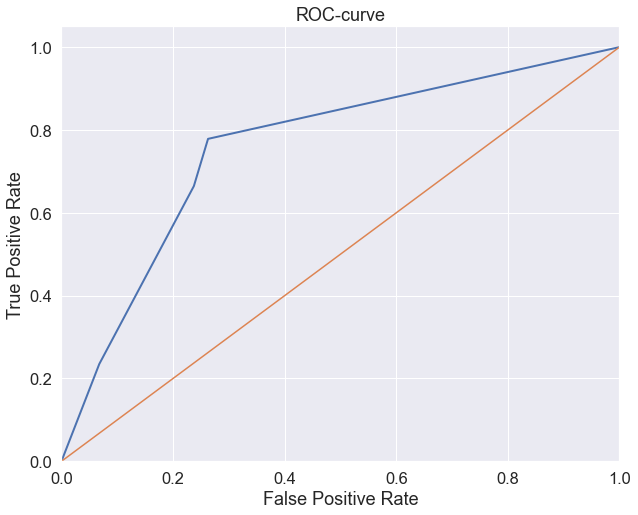

In [174]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, four_tree_test.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

## Лес.

Построим вторую модель: случайный лес.

In [175]:
four_rfc = RandomForestClassifier(random_state=0)

In [176]:
np.mean(cross_val_score(four_rfc, X_train, y_train, cv=5))

0.743909677419355

In [177]:
four_rfc.fit(X_train, y_train);

In [178]:
four_random_forest_predict = four_rfc.predict(X_test);

In [179]:
accuracy_score(y_test, four_random_forest_predict)

0.7528089887640449

In [180]:
report = classification_report(y_test, four_rfc.predict(X_test), target_names=['Здоровый', 'Больной'])
print(report)

              precision    recall  f1-score   support

    Здоровый       0.70      0.77      0.73       118
     Больной       0.80      0.74      0.77       149

    accuracy                           0.75       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.76      0.75      0.75       267



In [181]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

In [182]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)

In [183]:
%%time
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_features=None, max_leaf_nodes=3,
                       n_estimators=150)
Wall time: 39.4 s


Обучим модель с подобранными параметрами.

In [184]:
four_rfc_test = RandomForestClassifier(max_depth=6,
                                      max_features='sqrt',
                                      max_leaf_nodes=3,
                                      n_estimators=25)
four_rfc_test.fit(X_train, y_train)
four_rfc_test_predict = four_rfc_test.predict(X_test)
print(classification_report(four_rfc_test_predict, y_test))

              precision    recall  f1-score   support

           0       0.76      0.71      0.74       126
           1       0.76      0.80      0.78       141

    accuracy                           0.76       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.76      0.76      0.76       267



Нарисуем ROC-кривую.

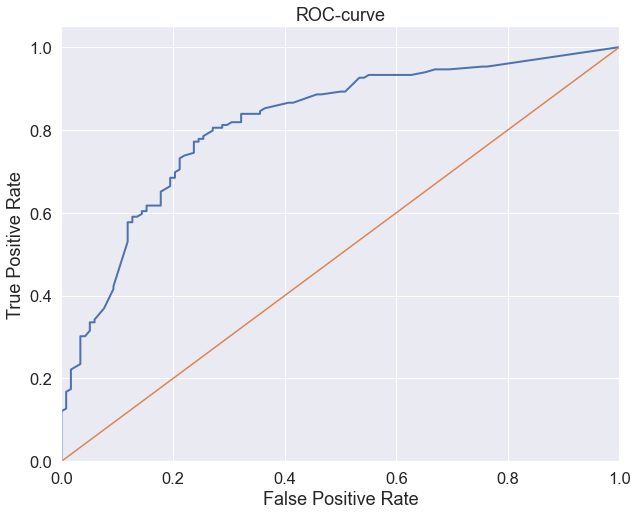

In [185]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, four_rfc_test.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

## Логистическая регрессия.

In [186]:
three_logreg = LogisticRegression(random_state=0)
np.mean(cross_val_score(three_logreg, X_train, y_train, cv=5))

0.7809806451612904

In [187]:
three_logreg.fit(X_train, y_train)
y_pred = three_logreg.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76       129
           1       0.77      0.83      0.79       138

    accuracy                           0.78       267
   macro avg       0.78      0.78      0.78       267
weighted avg       0.78      0.78      0.78       267



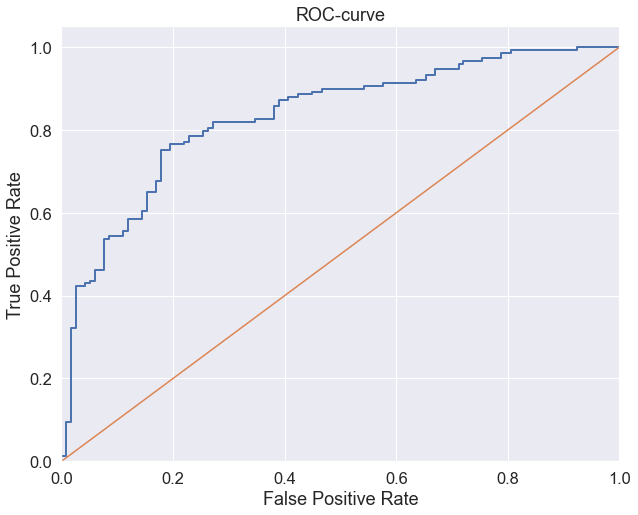

In [188]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, three_logreg.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

Применение 3-х главных компонент немного улучшило дерево, но ухудшило лес.

## 5 главных компонент.

Попробуем взять 5 главных компонент.

In [189]:
X_train, X_test, y_train, y_test = train_test_split(
    data_one_hot[data_one_hot.columns[:-1]], data_one_hot['num'], test_size=.3, random_state=0)

In [190]:
principal = PCA(n_components=5) 
X_train = principal.fit_transform(X_train) 
X_test = principal.transform(X_test) 

## Дерево.

Создадим экземпляр класса *tree*.

In [191]:
five_tree = DecisionTreeClassifier(random_state=0)

Кросс-валидация — это методика обучения и оценки модели, которая разбивает данные на несколько секций и обучает несколько алгоритмов на этих секциях. Этот метод повышает надежность модели, удерживая данные вне процесса обучения. Кроме повышения производительности на многих неучитываемых наблюдениях, в средах с ограниченными данными он может быть эффективным инструментом для обучения моделей с меньшим набором данных.

In [192]:
np.mean(cross_val_score(five_tree, X_train, y_train, cv=5))

0.6925290322580645

In [193]:
tree_params = {"max_depth": np.arange(1, 11), "max_features": [0.5, 0.7, 1]}
tree_grid = GridSearchCV(five_tree, tree_params, cv=5, n_jobs=-1)

In [194]:
%%time
tree_grid.fit(X_train, y_train);

Wall time: 156 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [195]:
tree_grid.best_score_, tree_grid.best_params_

(0.7664516129032257, {'max_depth': 1, 'max_features': 0.7})

Проверим гиперпараметр `max_features`.

In [196]:
max_features = {'max_features': [0.6, 0.65, 0.75, 0.8]}

tree_grid_features = GridSearchCV(five_tree, max_features, cv=5, n_jobs=-1)

In [197]:
%%time
tree_grid_features.fit(X_train,y_train);

Wall time: 31.7 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_features': [0.6, 0.65, 0.75, 0.8]})

In [198]:
tree_grid_features.best_score_, tree_grid_features.best_params_

(0.7085935483870968, {'max_features': 0.8})

Построим конечную модель дерева.

In [199]:
five_tree_test = DecisionTreeClassifier(max_depth=tree_grid.best_params_['max_depth'],
                                   max_features=tree_grid_features.best_params_['max_features'], random_state=0)

In [200]:
five_tree_test.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=1, max_features=0.8, random_state=0)

Проверим построенную модель на тестовой выборке:

In [201]:
five_tree_test_predict = five_tree_test.predict(X_test)

Исследуем долю верных ответов:

In [202]:
accuracy_score(y_test, five_tree_test_predict)

0.7340823970037453

In [203]:
report = classification_report(y_test, five_tree_test.predict(X_test), target_names=['Здоровый', 'Больной'])
print(report)

              precision    recall  f1-score   support

    Здоровый       0.67      0.77      0.72       118
     Больной       0.80      0.70      0.75       149

    accuracy                           0.73       267
   macro avg       0.73      0.74      0.73       267
weighted avg       0.74      0.73      0.73       267



Нарисуем ROC-кривую.

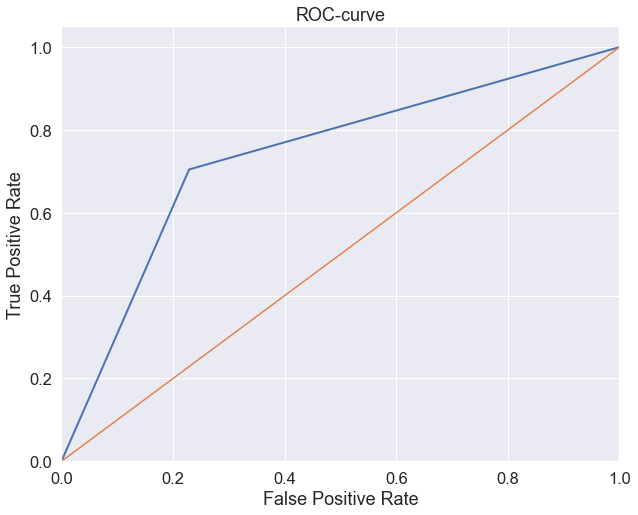

In [204]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, five_tree_test.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

## Лес.

Построим вторую модель: случайный лес.

In [205]:
five_rfc = RandomForestClassifier(random_state=0)

In [206]:
np.mean(cross_val_score(five_rfc, X_train, y_train, cv=5))

0.7552129032258066

In [207]:
five_rfc.fit(X_train, y_train);

In [208]:
five_random_forest_predict = five_rfc.predict(X_test);

In [209]:
accuracy_score(y_test, five_random_forest_predict)

0.7640449438202247

In [210]:
report = classification_report(y_test, five_rfc.predict(X_test), target_names=['Здоровый', 'Больной'])
print(report)

              precision    recall  f1-score   support

    Здоровый       0.72      0.77      0.74       118
     Больной       0.81      0.76      0.78       149

    accuracy                           0.76       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.77      0.76      0.76       267



In [211]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

Во-первых, давайте используем GridSearchCV для получения наилучших параметров для модели. Для этого мы передадим экземпляр RandomFoestClassifier() в модель, а затем подгоним GridSearchCV, используя обучающие данные, чтобы найти наилучшие параметры.

In [212]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)

In [213]:
%%time
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_features='sqrt', max_leaf_nodes=3,
                       n_estimators=25)
Wall time: 43.2 s


Обучим модель с подобранными параметрами.

In [214]:
five_rfc_test = RandomForestClassifier(max_depth=9,
                                      max_features='sqrt',
                                      max_leaf_nodes=9,
                                      n_estimators=150)
five_rfc_test.fit(X_train, y_train)
five_rfc_test_predict = five_rfc_test.predict(X_test)
print(classification_report(five_rfc_test_predict, y_test))

              precision    recall  f1-score   support

           0       0.75      0.70      0.72       125
           1       0.75      0.79      0.77       142

    accuracy                           0.75       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.75      0.75      0.75       267



Нарисуем ROC-кривую.

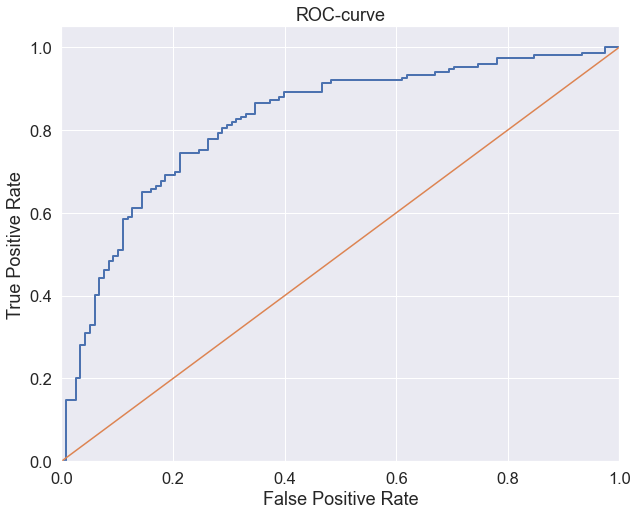

In [215]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, five_rfc_test.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

## Логистическая регрессия.

In [216]:
four_logreg = LogisticRegression(random_state=0)
np.mean(cross_val_score(four_logreg, X_train, y_train, cv=5))

0.7745161290322582

In [217]:
four_logreg.fit(X_train, y_train)
y_pred = four_logreg.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76       130
           1       0.76      0.82      0.79       137

    accuracy                           0.78       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.78      0.78      0.77       267



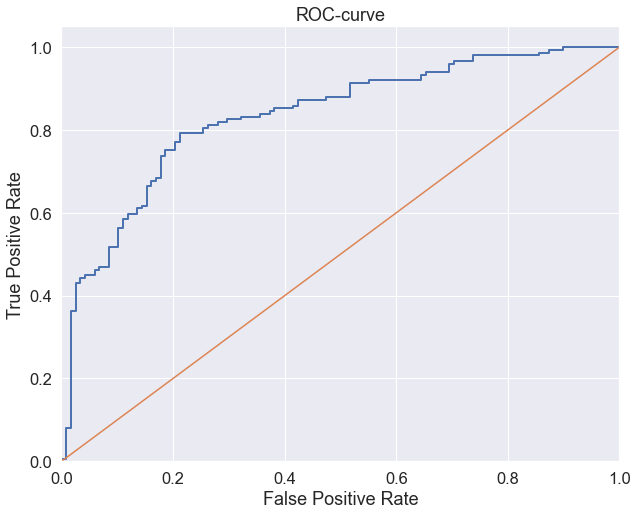

In [218]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, four_logreg.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

## 7 главных компонент.

Построим для 7 главных компонент.

In [219]:
X_train, X_test, y_train, y_test = train_test_split(
    data_one_hot[data_one_hot.columns[:-1]], data_one_hot['num'], test_size=.3, random_state=0)

In [220]:
principal = PCA(n_components=7) 
X_train = principal.fit_transform(X_train) 
X_test = principal.transform(X_test) 

## Дерево.

Создадим экземпляр класса *tree*.

In [221]:
six_tree = DecisionTreeClassifier(random_state=0)

Кросс-валидация — это методика обучения и оценки модели, которая разбивает данные на несколько секций и обучает несколько алгоритмов на этих секциях. Этот метод повышает надежность модели, удерживая данные вне процесса обучения. Кроме повышения производительности на многих неучитываемых наблюдениях, в средах с ограниченными данными он может быть эффективным инструментом для обучения моделей с меньшим набором данных.

In [222]:
np.mean(cross_val_score(six_tree, X_train, y_train, cv=5))

0.7086193548387097

In [223]:
tree_params = {"max_depth": np.arange(1, 11), "max_features": [0.5, 0.7, 1]}
tree_grid = GridSearchCV(six_tree, tree_params, cv=5, n_jobs=-1)

In [224]:
%%time
tree_grid.fit(X_train, y_train);

Wall time: 146 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [225]:
tree_grid.best_score_, tree_grid.best_params_

(0.7728645161290322, {'max_depth': 3, 'max_features': 0.7})

Проверим гиперпараметр `max_features`.

In [226]:
max_features = {'max_features': [0.6, 0.65, 0.75, 0.8]}

tree_grid_features = GridSearchCV(six_tree, max_features, cv=5, n_jobs=-1)

In [227]:
%%time
tree_grid_features.fit(X_train,y_train);

Wall time: 32.1 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_features': [0.6, 0.65, 0.75, 0.8]})

In [228]:
tree_grid_features.best_score_, tree_grid_features.best_params_

(0.6860258064516129, {'max_features': 0.75})

Построим конечную модель дерева.

In [229]:
six_tree_test = DecisionTreeClassifier(max_depth=tree_grid.best_params_['max_depth'],
                                   max_features=tree_grid_features.best_params_['max_features'], random_state=0)

In [230]:
six_tree_test.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=0.75, random_state=0)

Проверим построенную модель на тестовой выборке:

In [231]:
six_tree_test_predict = six_tree_test.predict(X_test)

Исследуем долю верных ответов:

In [232]:
accuracy_score(y_test, six_tree_test_predict)

0.7640449438202247

In [233]:
report = classification_report(y_test, six_tree_test.predict(X_test), target_names=['Здоровый', 'Больной'])
print(report)

              precision    recall  f1-score   support

    Здоровый       0.74      0.72      0.73       118
     Больной       0.78      0.80      0.79       149

    accuracy                           0.76       267
   macro avg       0.76      0.76      0.76       267
weighted avg       0.76      0.76      0.76       267



Нарисуем ROC-кривую.

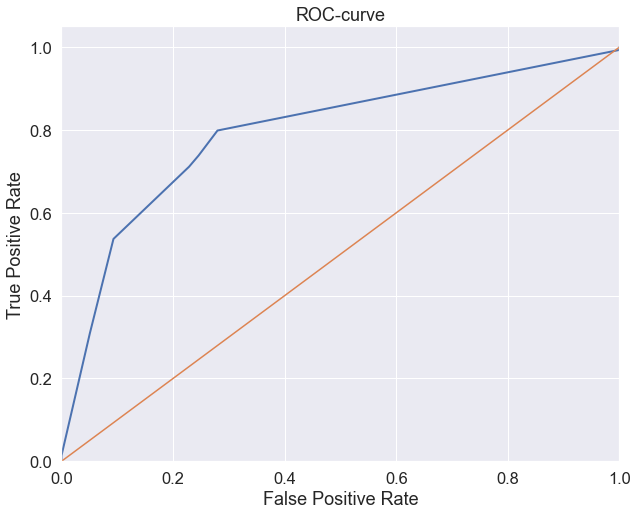

In [234]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, six_tree_test.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

## Лес.

Построим вторую модель: случайный лес.

In [235]:
six_rfc = RandomForestClassifier(random_state=0)

In [236]:
np.mean(cross_val_score(six_rfc, X_train, y_train, cv=5))

0.7616387096774193

In [237]:
six_rfc.fit(X_train, y_train);

In [238]:
six_random_forest_predict = six_rfc.predict(X_test);

In [239]:
accuracy_score(y_test, six_random_forest_predict)

0.7565543071161048

In [240]:
report = classification_report(y_test, six_rfc.predict(X_test), target_names=['Здоровый', 'Больной'])
print(report)

              precision    recall  f1-score   support

    Здоровый       0.73      0.72      0.72       118
     Больной       0.78      0.79      0.78       149

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



In [241]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

Во-первых, давайте используем GridSearchCV для получения наилучших параметров для модели. Для этого мы передадим экземпляр RandomFoestClassifier() в модель, а затем подгоним GridSearchCV, используя обучающие данные, чтобы найти наилучшие параметры.

In [242]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)

In [243]:
%%time
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=50)
Wall time: 43.7 s


Обучим модель с подобранными параметрами.

In [244]:
six_rfc_test = RandomForestClassifier(max_depth=6,
                                      max_features=None,
                                      max_leaf_nodes=9,
                                      n_estimators=50)
six_rfc_test.fit(X_train, y_train)
six_rfc_test_predict = six_rfc_test.predict(X_test)
print(classification_report(six_rfc_test_predict, y_test))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       129
           1       0.74      0.80      0.77       138

    accuracy                           0.76       267
   macro avg       0.76      0.75      0.76       267
weighted avg       0.76      0.76      0.76       267



Нарисуем ROC-кривую.

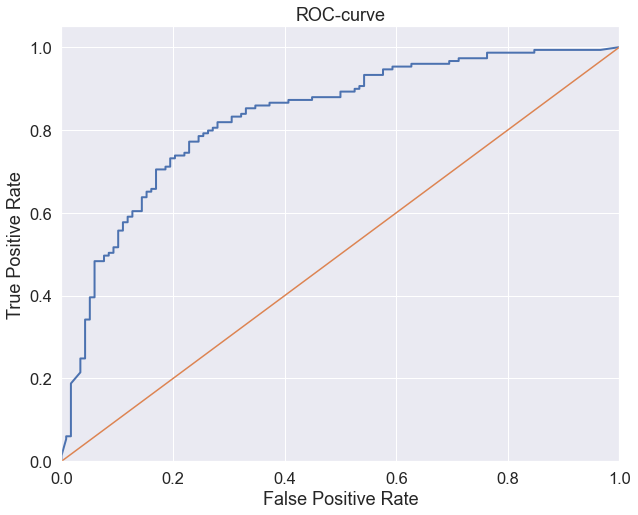

In [245]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, six_rfc_test.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

## Логистическая регрессия.

In [246]:
five_logreg = LogisticRegression(random_state=0)
np.mean(cross_val_score(five_logreg, X_train, y_train, cv=5))

0.7712645161290321

In [247]:
five_logreg.fit(X_train, y_train)
y_pred = five_logreg.predict(X_test)
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76       132
           1       0.75      0.83      0.79       135

    accuracy                           0.78       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.78      0.78      0.77       267



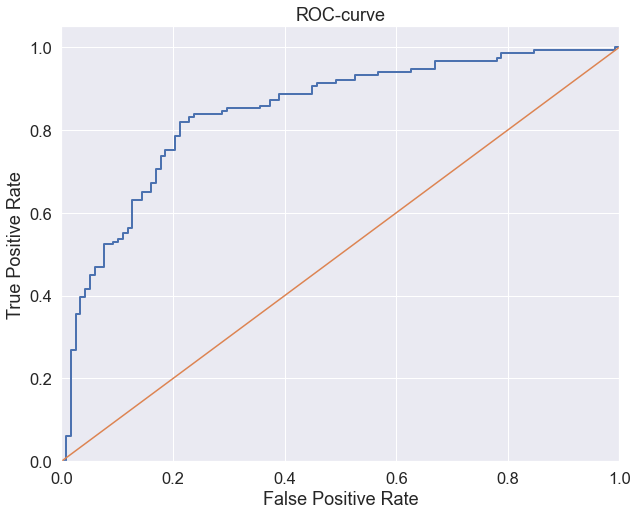

In [248]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, five_logreg.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

# Обработка категориальных признаков с помощью Target Encoder.

Применим Target Encoder (подробнее <a href="https://medium.com/analytics-vidhya/target-encoding-vs-one-hot-encoding-with-simple-examples-276a7e7b3e64">здесь</a>).

In [246]:
data_target = data.copy()

In [247]:
from category_encoders import TargetEncoder

Начнём с призанка `sex`.

In [248]:
encoder = TargetEncoder()
data_target.drop(['sex'], axis=1, inplace=True)

In [249]:
df_sex = encoder.fit_transform(data['sex'], data['num'])

In [250]:
data_target.insert(1, df_sex.columns[0], df_sex.values)

In [251]:
pd.crosstab([data_target['sex'], data['sex']], data['num'])

,num,0,1
sex,sex,,
0.257732,Female,144,50
0.626801,Male,259,435


Призанк `dataset`.

In [252]:
encoder = TargetEncoder()
data_target.drop(['dataset'], axis=1, inplace=True)

In [253]:
df_dataset = encoder.fit_transform(data['dataset'], data['num'])

In [254]:
data_target.insert(2, df_dataset.columns[0], df_dataset.values)

In [255]:
pd.crosstab([data_target['dataset'], data['dataset']], data['num'])

,num,0,1
dataset,dataset,,
0.361775,Hungary,187,106
0.457237,Cleveland,165,139
0.750000,VA Long Beach,43,129
0.932754,Switzerland,8,111


Есть вероятность того, что модель будет переобучена, если применять такой метод кодирования к признаку `dataset`.

In [256]:
encoder = TargetEncoder()
data_target.drop(['cp'], axis=1, inplace=True)
df_cp = encoder.fit_transform(data['cp'], data['num'])

In [257]:
data_target.insert(3, df_cp.columns[0], df_cp.values)

In [258]:
pd.crosstab([data_target['cp'], data['cp']], data['num'])

,num,0,1
cp,cp,,
0.139535,atypical angina,148,24
0.341837,non-anginal,129,67
0.451366,typical angina,24,19
0.786164,asymptomatic,102,375


В принципе похоже на правду, но ещё пока нет.

In [259]:
encoder = TargetEncoder()
data_target.drop(['restecg'], axis=1, inplace=True)
df_restecg = encoder.fit_transform(data['restecg'], data['num'])

In [260]:
data_target.insert(7, df_restecg.columns[0], df_restecg.values)

In [261]:
pd.crosstab([data_target['restecg'], data['restecg']], data['num'])

,num,0,1
restecg,restecg,,
0.509259,normal,265,275
0.562162,lv hypertrophy,81,104
0.650307,st-t abnormality,57,106


# Обучение модели на всех признаках.

Построим модели для полученного набора данных.

In [359]:
X_train, X_test, y_train, y_test = train_test_split(
    data_target[data_target.columns[:-1]], data_target['num'], test_size=.3, random_state=0)

## Дерево.

Создадим экземпляр класса *tree*.

In [360]:
seven_tree = DecisionTreeClassifier(random_state=0)

Кросс-валидация — это методика обучения и оценки модели, которая разбивает данные на несколько секций и обучает несколько алгоритмов на этих секциях. Этот метод повышает надежность модели, удерживая данные вне процесса обучения. Кроме повышения производительности на многих неучитываемых наблюдениях, в средах с ограниченными данными он может быть эффективным инструментом для обучения моделей с меньшим набором данных.

In [264]:
np.mean(cross_val_score(seven_tree, X_train, y_train, cv=5))

0.7277935483870968

In [361]:
tree_params = {"max_depth": np.arange(1, 11), "max_features": [0.5, 0.7, 1]}
tree_grid = GridSearchCV(seven_tree, tree_params, cv=5, n_jobs=-1)

In [362]:
%%time
tree_grid.fit(X_train, y_train);

Wall time: 5.57 s


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'max_features': [0.5, 0.7, 1]})

In [363]:
tree_grid.best_score_, tree_grid.best_params_

(0.7794193548387096, {'max_depth': 4, 'max_features': 0.7})

Проверим гиперпараметр `max_features`.

In [268]:
max_features = {'max_features': [0.6, 0.65, 0.75, 0.8]}

tree_grid_features = GridSearchCV(seven_tree, max_features, cv=5, n_jobs=-1)

In [269]:
%%time
tree_grid_features.fit(X_train,y_train);

Wall time: 62.8 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_features': [0.6, 0.65, 0.75, 0.8]})

In [270]:
tree_grid_features.best_score_, tree_grid_features.best_params_

(0.7311096774193547, {'max_features': 0.6})

Построим конечную модель дерева.

In [271]:
seven_tree_test = DecisionTreeClassifier(max_depth=tree_grid.best_params_['max_depth'],
                                   max_features=tree_grid_features.best_params_['max_features'], random_state=0)

In [272]:
seven_tree_test.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.6, random_state=0)

Проверим построенную модель на тестовой выборке:

In [273]:
seven_tree_test_predict = seven_tree_test.predict(X_test)

Исследуем долю верных ответов:

In [274]:
accuracy_score(y_test, seven_tree_test_predict)

0.7790262172284644

Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом действительно являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.

Ошибки классификации бывают двух видов: False Positive и False Negative. В статистике первый вид ошибок называют ошибкой I-го рода, а второй — ошибкой II-го рода. В нашей задаче ошибкой первого рода будет принятие здорового человека за больного, соответственно, ошибкой второго рода будет являться "пропуск" больного человека и ошибочное принятие его за здорового.

In [275]:
report = classification_report(y_test, seven_tree_test.predict(X_test), target_names=['Здоровый', 'Больной'])
print(report)

              precision    recall  f1-score   support

    Здоровый       0.79      0.68      0.73       118
     Больной       0.77      0.86      0.81       149

    accuracy                           0.78       267
   macro avg       0.78      0.77      0.77       267
weighted avg       0.78      0.78      0.78       267



Нарисуем ROC-кривую.

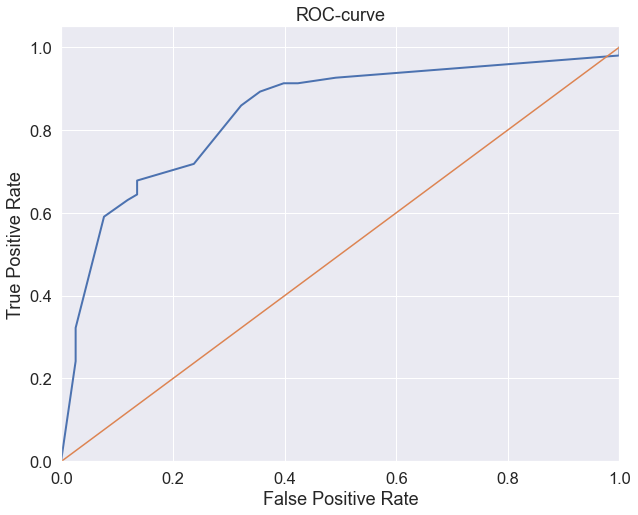

In [276]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, seven_tree_test.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

In [277]:
from sklearn.tree import export_graphviz

export_graphviz(seven_tree_test, out_file="first_tree.dot", feature_names=X_test.columns, filled = True)

In [278]:
!ls -l *.png
!dot -Tpng first_tree.dot -o first_tree.png

"ls" не является внутренней или внешней
командой, исполняемой программой или пакетным файлом.


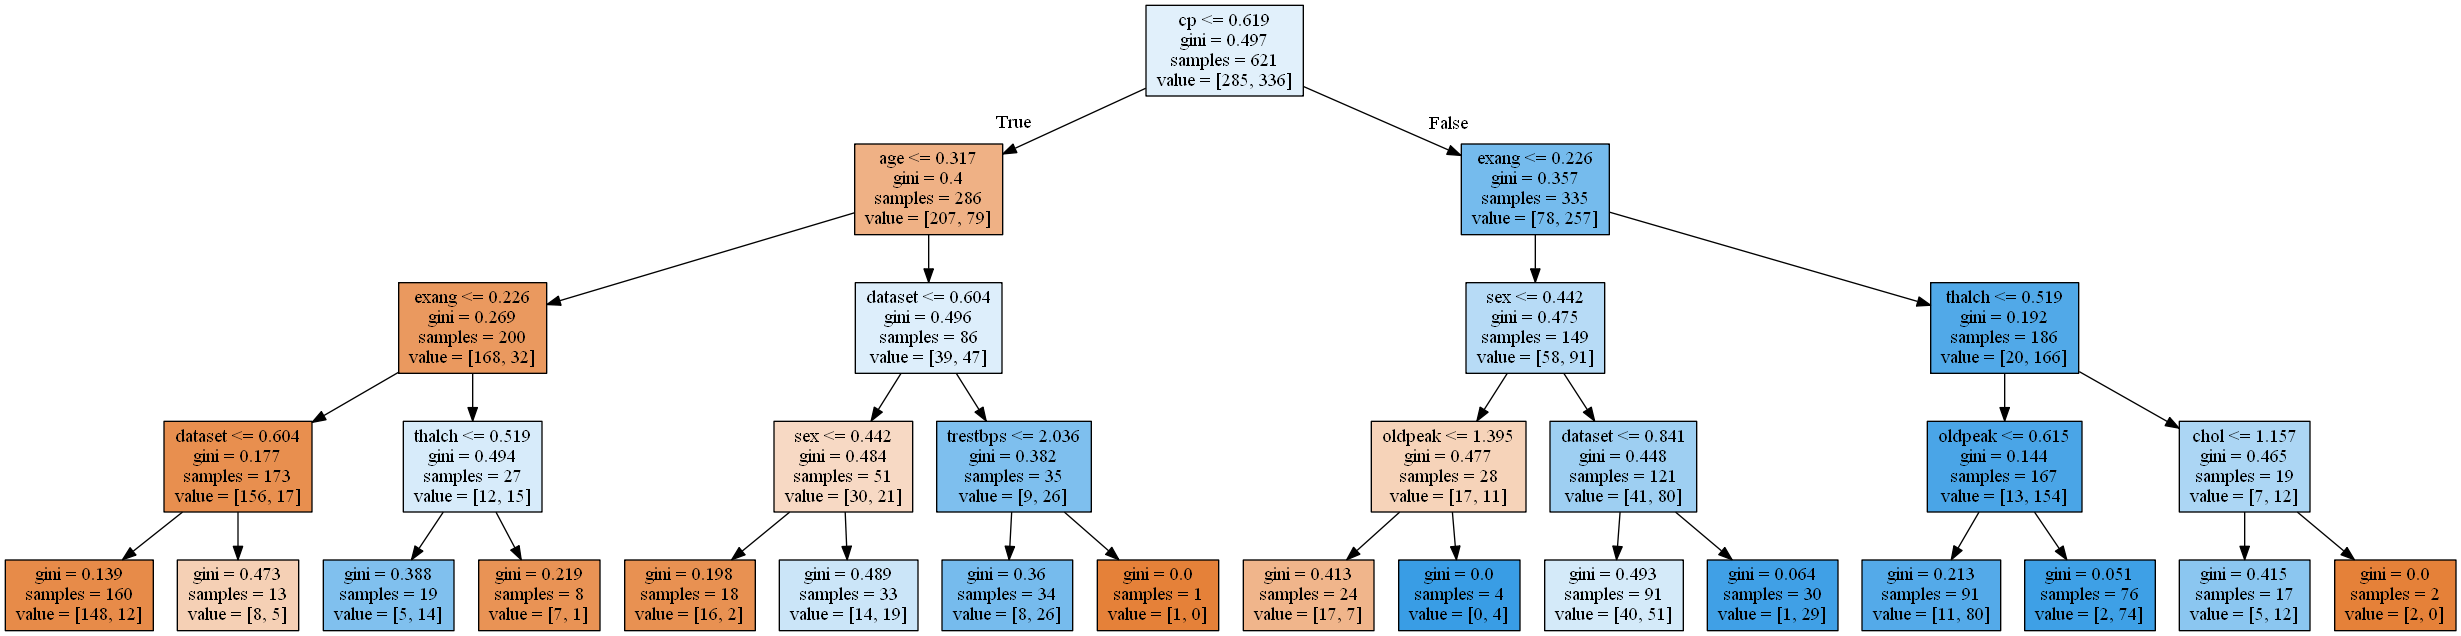

In [285]:
from IPython.display import Image # Библиотека для отображения картинок

display(Image(filename = 'first_tree.png', width = 2000, height=1300)) 

In [309]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, seven_tree_test.predict_proba(X_test)[:,1])

0.8389261744966443

## Лес.

Построим вторую модель: случайный лес.

In [338]:
seven_rfc = RandomForestClassifier(random_state=0)

In [339]:
np.mean(cross_val_score(seven_rfc, X_train, y_train, cv=5))

0.8019225806451613

In [340]:
seven_rfc.fit(X_train, y_train);

In [341]:
seven_random_forest_predict = seven_rfc.predict(X_test);

In [342]:
accuracy_score(y_test, seven_random_forest_predict)

0.8202247191011236

In [343]:
report = classification_report(y_test, seven_rfc.predict(X_test), target_names=['Здоровый', 'Больной'])
print(report)

              precision    recall  f1-score   support

    Здоровый       0.79      0.81      0.80       118
     Больной       0.85      0.83      0.84       149

    accuracy                           0.82       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.82      0.82      0.82       267



In [344]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

Во-первых, давайте используем GridSearchCV для получения наилучших параметров для модели. Для этого мы передадим экземпляр RandomFoestClassifier() в модель, а затем подгоним GridSearchCV, используя обучающие данные, чтобы найти наилучшие параметры.

In [345]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)

In [346]:
%%time
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=6,
                       n_estimators=50)
Wall time: 42.5 s


Обучим модель с подобранными параметрами.

In [347]:
seven_rfc_test = RandomForestClassifier(max_depth=9,
                                      max_features='sqrt',
                                      max_leaf_nodes=6,
                                      n_estimators=50)
seven_rfc_test.fit(X_train, y_train)
seven_rfc_test_predict = seven_rfc_test.predict(X_test)
print(classification_report(seven_rfc_test_predict, y_test))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       118
           1       0.83      0.83      0.83       149

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



In [348]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}

Во-первых, давайте используем GridSearchCV для получения наилучших параметров для модели. Для этого мы передадим экземпляр RandomFoestClassifier() в модель, а затем подгоним GridSearchCV, используя обучающие данные, чтобы найти наилучшие параметры.

In [349]:
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)

In [350]:
%%time
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=6, max_features='log2', max_leaf_nodes=9,
                       n_estimators=25)
Wall time: 41.7 s


Обучим модель с подобранными параметрами.

In [351]:
seven_rfc_test = RandomForestClassifier(max_depth=3,
                                      max_features='sqrt',
                                      max_leaf_nodes=9,
                                      n_estimators=50)
seven_rfc_test.fit(X_train, y_train)
seven_rfc_test_predict = seven_rfc_test.predict(X_test)
print(classification_report(seven_rfc_test_predict, y_test))

              precision    recall  f1-score   support

           0       0.81      0.76      0.78       125
           1       0.80      0.84      0.82       142

    accuracy                           0.80       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.80      0.80      0.80       267



Нарисуем ROC-кривую.

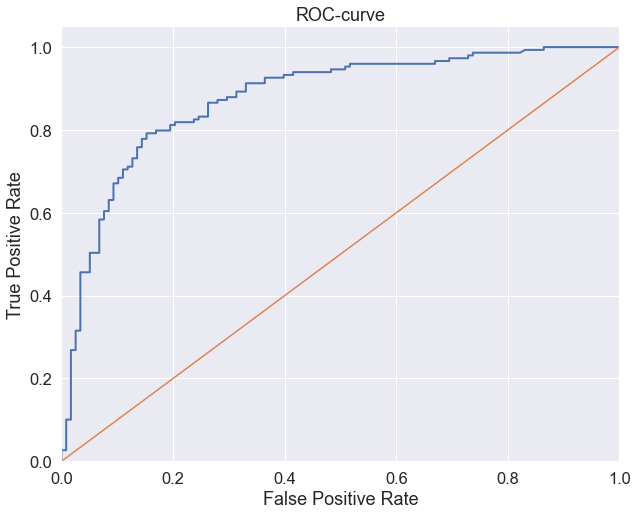

In [352]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, seven_rfc_test.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

In [353]:
roc_auc_score(y_test, seven_rfc_test.predict_proba(X_test)[:,1])

0.8768911386645433

## Логистическая регрессия.

In [355]:
six_logreg = LogisticRegression(random_state=0)
np.mean(cross_val_score(six_logreg, X_train, y_train, cv=5))

0.8083612903225805

In [356]:
six_logreg.fit(X_train, y_train)
y_pred = six_logreg.predict(X_test)
print(classification_report(y_pred, y_test, target_names=['Здоровый', 'Больной']))

              precision    recall  f1-score   support

    Здоровый       0.84      0.79      0.81       125
     Больной       0.83      0.87      0.85       142

    accuracy                           0.83       267
   macro avg       0.83      0.83      0.83       267
weighted avg       0.83      0.83      0.83       267



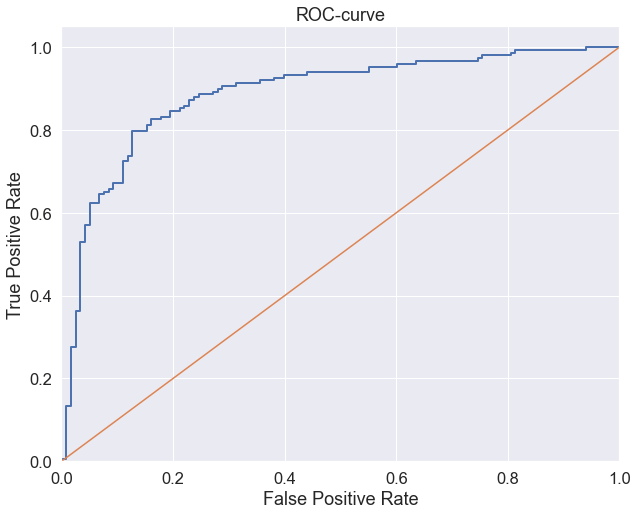

In [357]:
sns.set(font_scale=1.5);
sns.set_color_codes("muted");

plt.figure(figsize=(10, 8));
fpr, tpr, thresholds = roc_curve(y_test, six_logreg.predict_proba(X_test)[:,1], pos_label=1);
lw = 2;
plt.plot(fpr, tpr, lw=lw, label='ROC curve ');
plt.plot([0, 1], [0, 1]);
plt.xlim([0.0, 1.0]);
plt.ylim([0.0, 1.05]);
plt.xlabel('False Positive Rate');
plt.ylabel('True Positive Rate');
plt.title('ROC-curve');
#plt.savefig("ROC.png")

In [358]:
roc_auc_score(y_test, six_logreg.predict_proba(X_test)[:,1])

0.8868160618814697

# Итоги.

На данный момент лучшей является модель случайного леса с параметрами по умолчанию для категориальных признаков, обработанных с помощью таргет-энкодера.

## Кривые валидации и обучения (в обработке).

Нужно прочитать про validation_curve и learning_curve.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve

import matplotlib.pyplot as plt

pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(random_state=0))

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=10, train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Train примеры")
    plt.ylabel("Оценка")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="C-V score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(RandomForestClassifier(random_state=0), 
                    "Кривая обучения", 
                    X_train, 
                    y_train, 
                    cv=5);